In [222]:
# 📚 Basic Libraries
import pandas as pd # manipulación de datos
import numpy as np # matemáticas operaciones
import warnings # warnings son inútiles

# 📊 Visualizations
import matplotlib.pyplot as plt # visualización básica
import seaborn as sns # visualización más chachi

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor



# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [223]:
data = pd.read_csv('/Users/sebastianbrockschmidt/Desktop/House Project/king_ country_ houses_aa.csv')

In [224]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [263]:
data.view.value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [265]:
data.waterfront.value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [225]:
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [226]:
df = data.copy()

In [227]:
df.set_index('id', inplace=True)

In [228]:
df.set_index('id', inplace=True)

KeyError: "None of ['id'] are in the columns"

In [229]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [230]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [231]:
df.date.value_counts()

date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: count, Length: 372, dtype: int64

In [232]:
df['date'] = df['date'].str[:-7]

In [233]:
df['date'] = df['date'].astype(int)

In [234]:
df.dtypes

date               int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [235]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [236]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [237]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [238]:
df.duplicated().sum()

0

In [239]:
df.eq(" ").sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [240]:
df.nunique()

date              372
price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [241]:
df.condition.value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

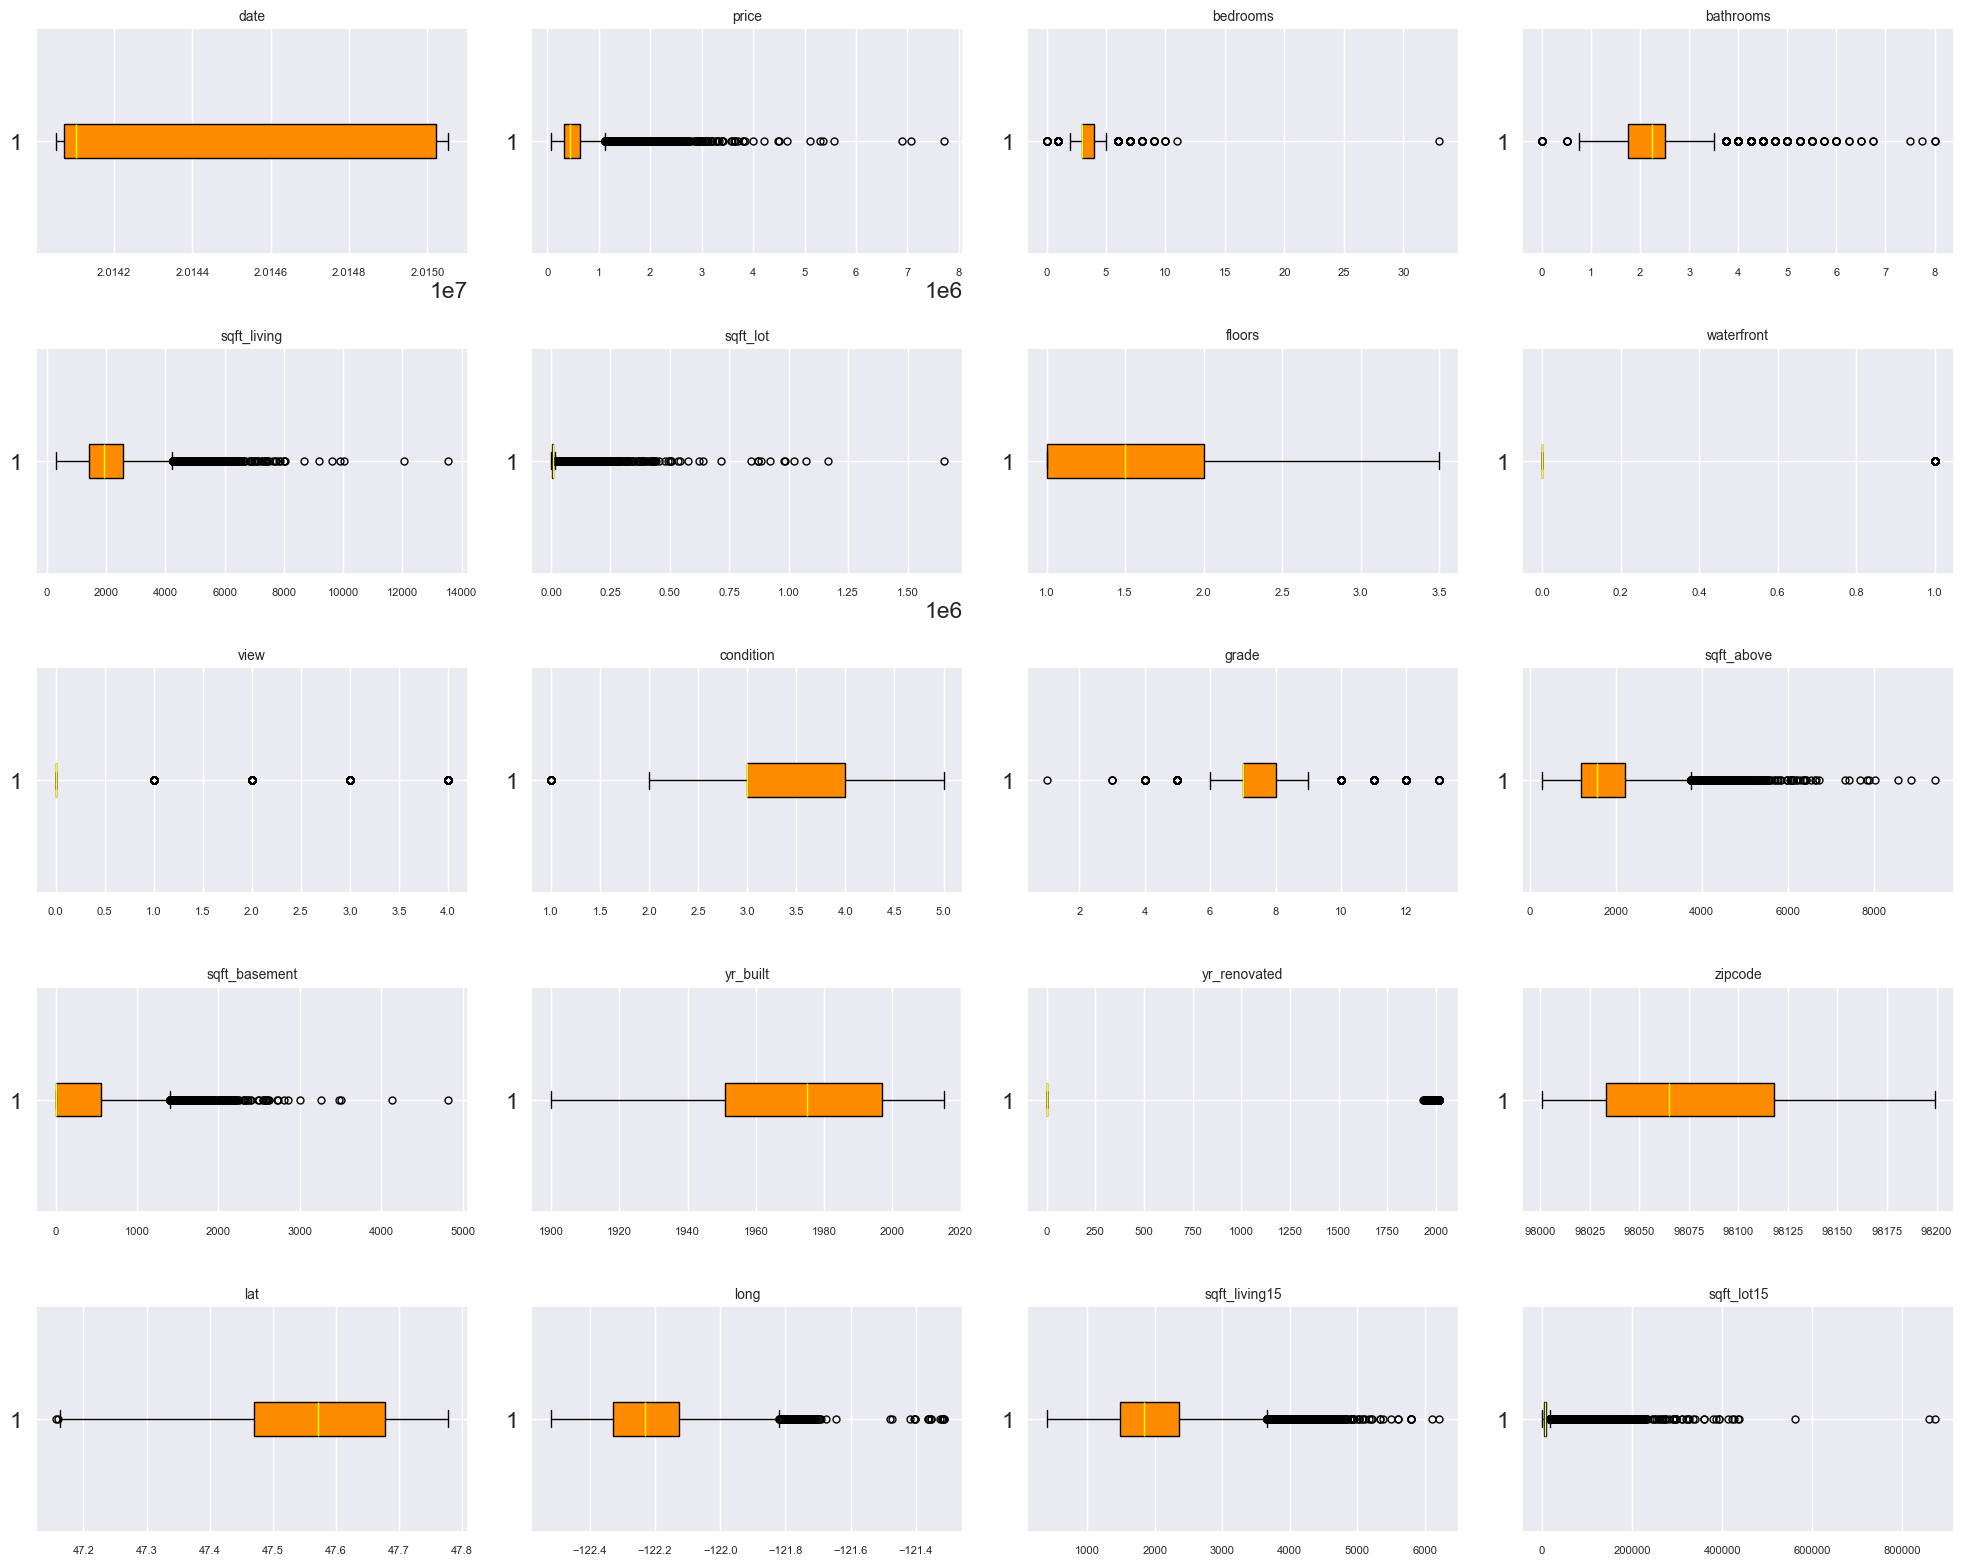

In [242]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

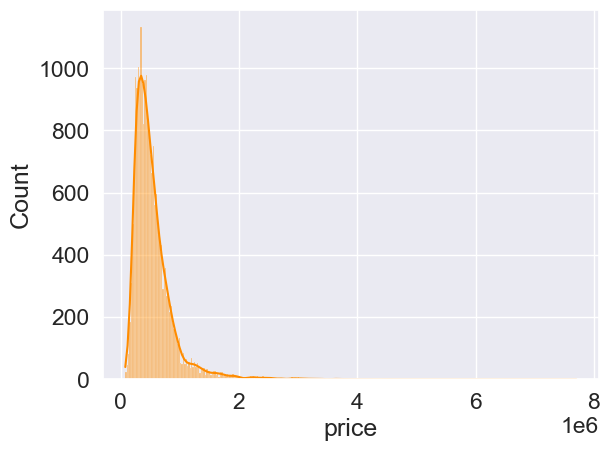

In [243]:
sns.histplot(df["price"], color=color, kde=True);

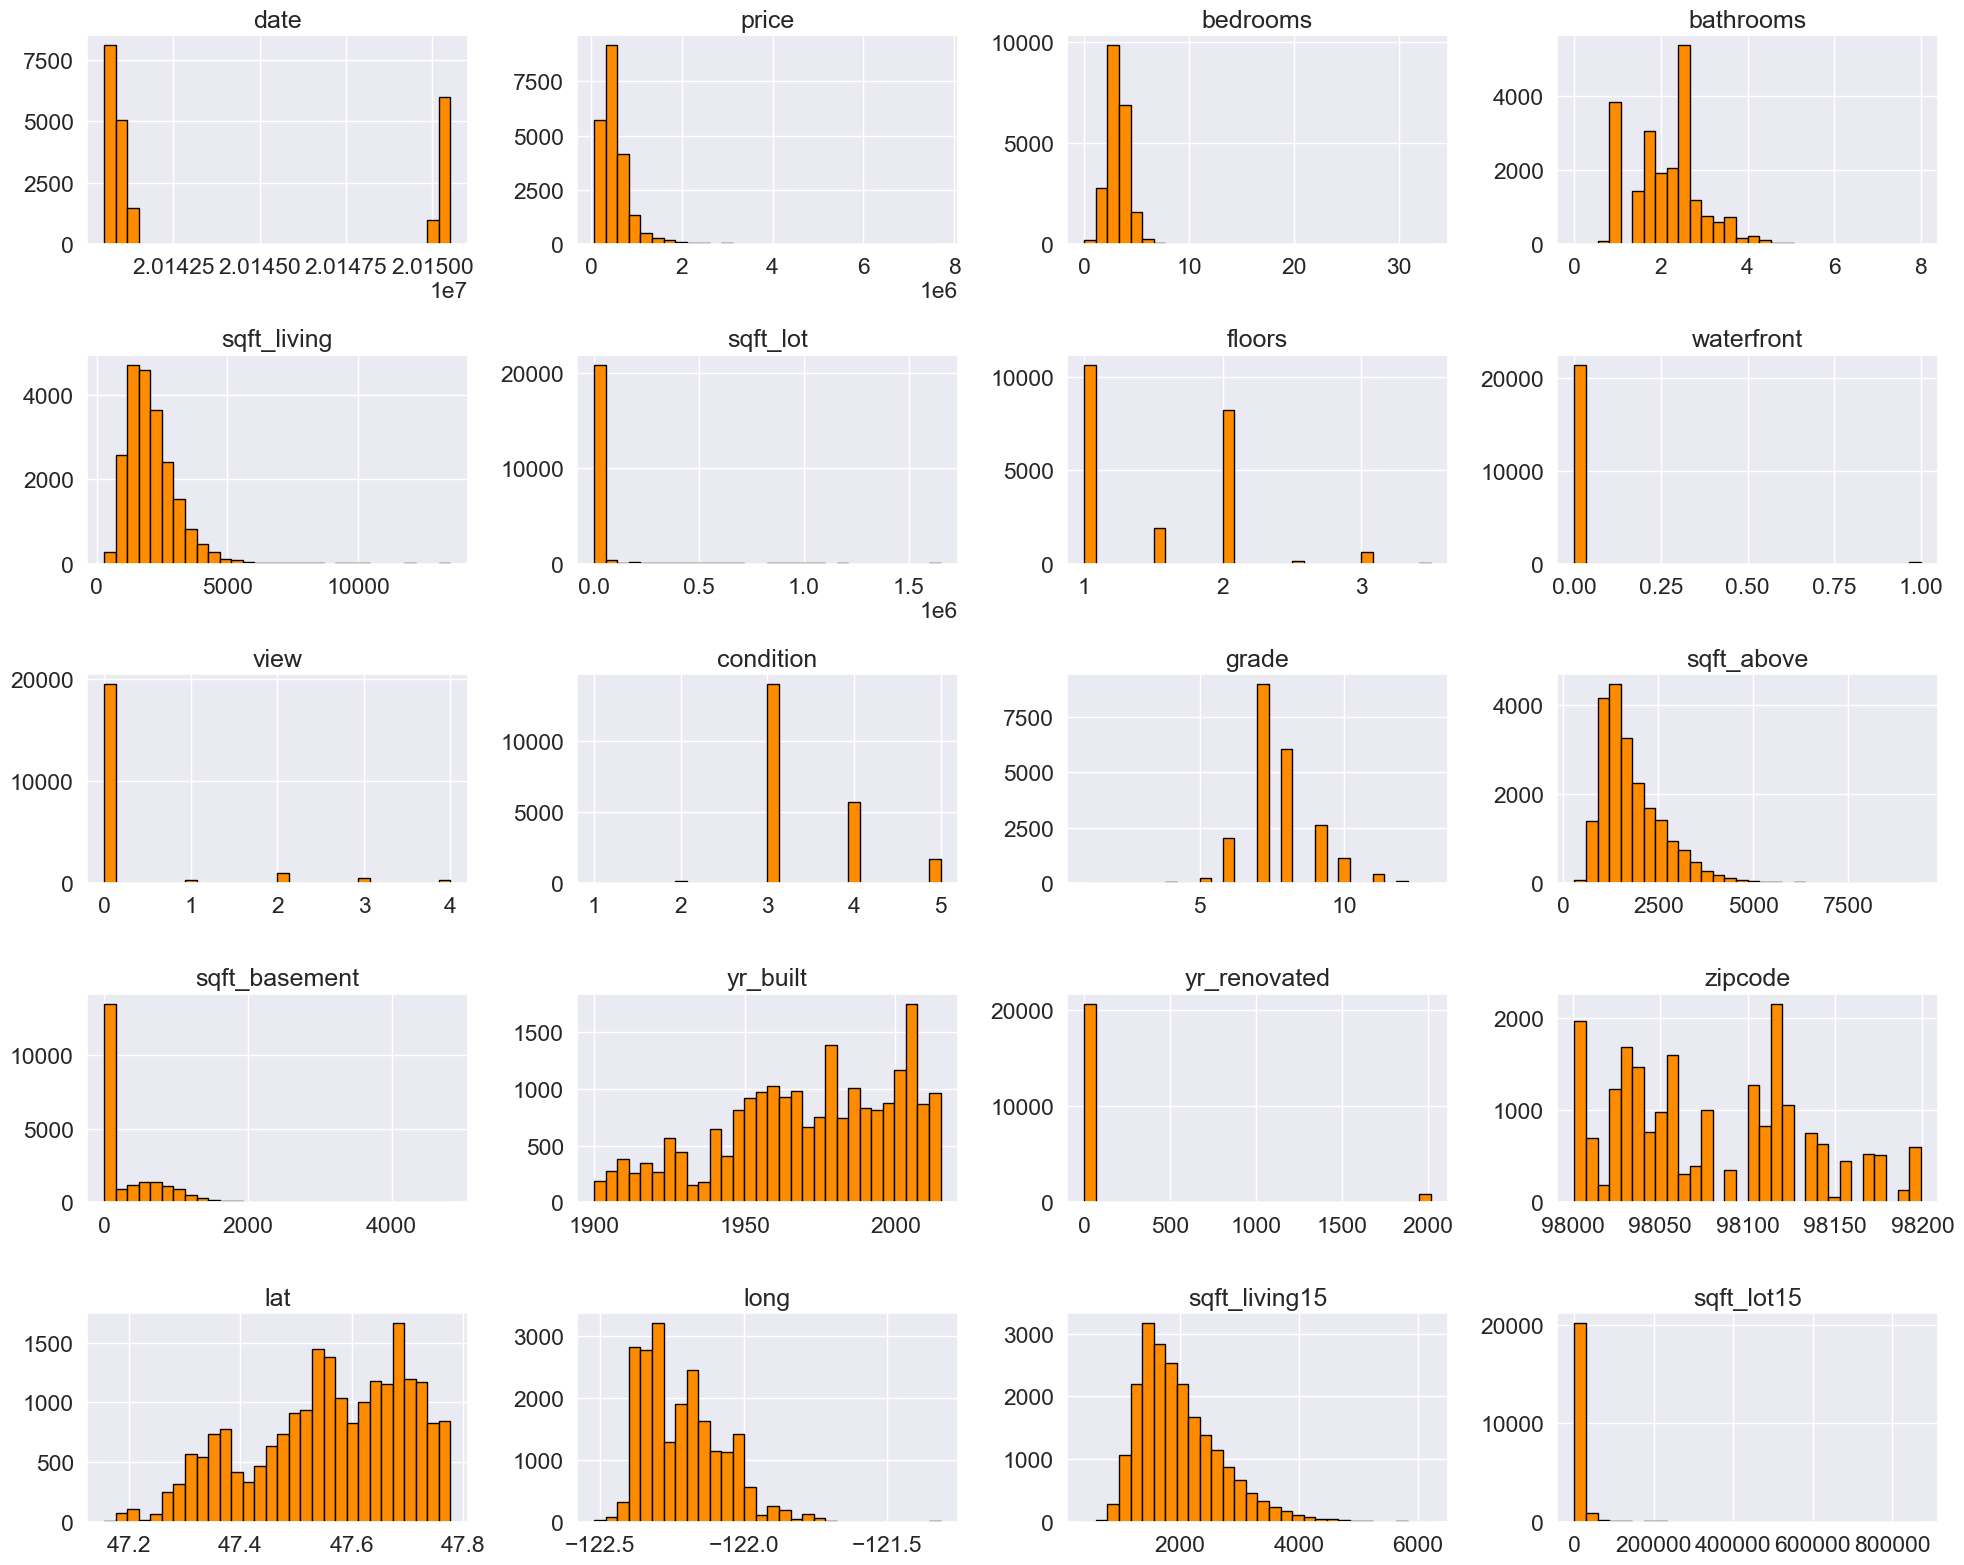

In [244]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [245]:
df_move = df.pop('price')

In [246]:
df['price'] = df_move

In [247]:
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date             0.003033
zipcode         -0.053203
dtype: float64

In [248]:
num_corr = round(df.corr(), 2)

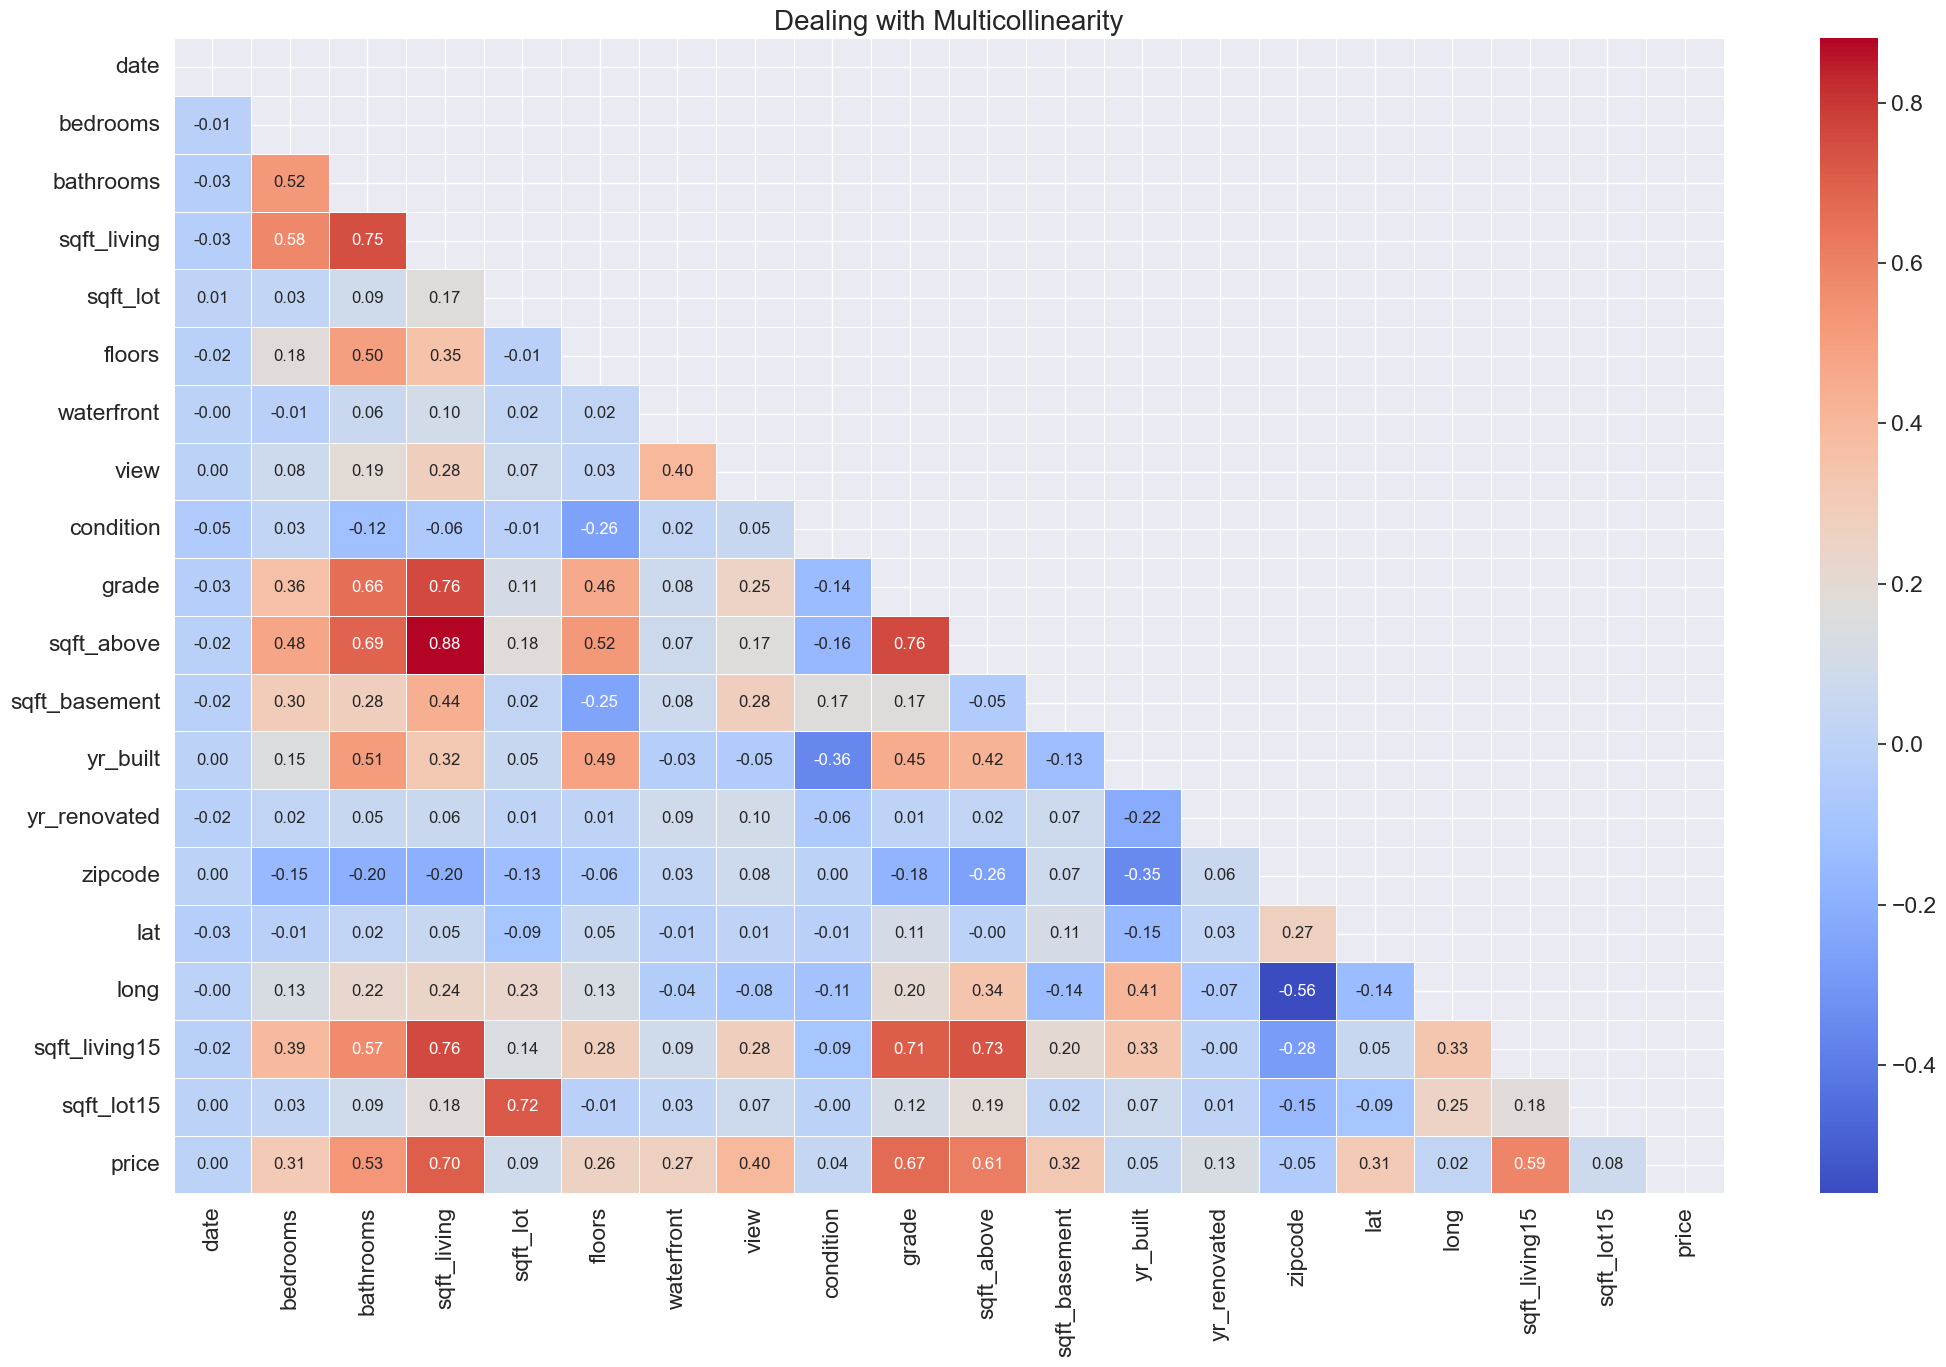

In [249]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [250]:
X = df.drop("price", axis=1)
y = df["price"]

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [252]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


In [173]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [174]:
predictions = model.predict(X_test)
predictions

array([ 450074.36606774,  741255.8193735 , 1233036.32592179, ...,
        368228.41122614,  805408.46132742,  572522.6478632 ])

In [175]:
eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})
eval_df

,actual,pred
id,,
2591820310,365000.0,4.500744e+05
7974200820,865000.0,7.412558e+05
7701450110,1038000.0,1.233036e+06
9522300010,1490000.0,1.686120e+06
9510861140,711000.0,7.273947e+05
...,...,...
1402660150,412000.0,5.149430e+05
2301400325,760000.0,6.782398e+05
6150200005,410500.0,3.682284e+05


In [176]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()

,actual,pred,dif
id,,,
2591820310,365000.0,4.500744e+05,85074.366068
7974200820,865000.0,7.412558e+05,123744.180626
7701450110,1038000.0,1.233036e+06,195036.325922
9522300010,1490000.0,1.686120e+06,196119.999352
9510861140,711000.0,7.273947e+05,16394.704914


In [177]:
mae = np.mean(eval_df["dif"])
mae

126954.96080241734

In [178]:
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [179]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.7009
RMSE =  207813.592
MSE =   43186489011.1869
MAE =  126954.9608


In [180]:
# create normalization object from scikit learn package, and "fit" it to the features in hand
normalizer = MinMaxScaler()
# we want to use the training data to normalize (establishing maximum and minimum values) to avoid data "leakage" from the test dataset
df_norm = normalizer.fit(df).transform(df)
df_norm = pd.DataFrame(df_norm, columns = df.columns)


In [181]:
X = df_norm.drop("price", axis=1)
y = df_norm["price"]

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [183]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [184]:
predictions = model.predict(X_test)
predictions

array([0.04905359, 0.08706642, 0.15277937, ..., 0.03830466, 0.09607577,
       0.06529039])

In [185]:
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [142]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.7009
RMSE =  0.0273
MSE =   0.0007
MAE =  0.0167


In [161]:
scaler = StandardScaler()

In [162]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [163]:
X = df_scaled.drop("price", axis=1)
y = df_scaled["price"]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [165]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [166]:
predictions = model.predict(X_test)
predictions

array([-0.24521426,  0.54793466,  1.88780892, ..., -0.46813831,
        0.72275029,  0.08829184])

In [167]:
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [168]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.7009
RMSE =  0.5661
MSE =   0.3204
MAE =  0.3458


In [186]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [187]:
predictions_knn = knn.predict(X_test)

AttributeError: 'NoneType' object has no attribute 'split'

In [190]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [191]:
predictions_tree = tree.predict(X_test)

In [192]:
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_3_4 = mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

In [193]:
#Printing the results
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.7387
RMSE =  0.0255
The value of the metric MSE is  0.0006
MAE =  0.0135


In [195]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [196]:
predictions_xgb = xgbr.predict(X_test)

In [197]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

In [198]:
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.7669
RMSE =  0.0241
The value of the metric MSE is  0.0006
MAE =  0.0131


In [253]:
model = RandomForestRegressor()

In [254]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [255]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # sorts indices of importances in descending order

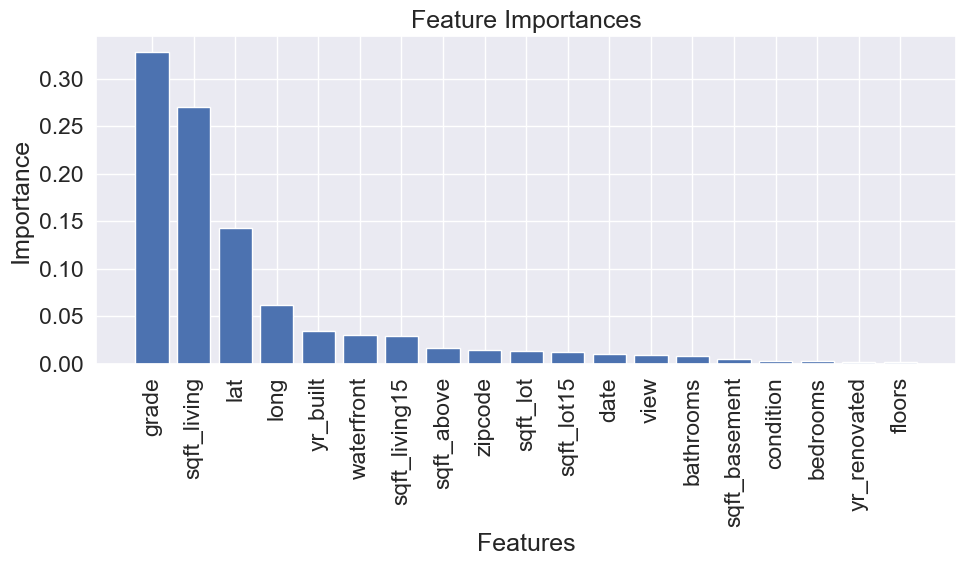

In [256]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [257]:
predictions = model.predict(X_test)

In [258]:
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.7669
RMSE =  0.0241
The value of the metric MSE is  0.0006
MAE =  0.0131


In [259]:
eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})
eval_df

,actual,pred
id,,
2591820310,365000.0,382989.50
7974200820,865000.0,826850.50
7701450110,1038000.0,1125197.00
9522300010,1490000.0,2160914.00
9510861140,711000.0,707687.80
...,...,...
1402660150,412000.0,378817.50
2301400325,760000.0,645381.02
6150200005,410500.0,329013.50


In [260]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()

,actual,pred,dif
id,,,
2591820310,365000.0,382989.5,17989.5
7974200820,865000.0,826850.5,38149.5
7701450110,1038000.0,1125197.0,87197.0
9522300010,1490000.0,2160914.0,670914.0
9510861140,711000.0,707687.8,3312.2


In [261]:
mae = np.mean(eval_df["dif"])
mae

72896.99397902528

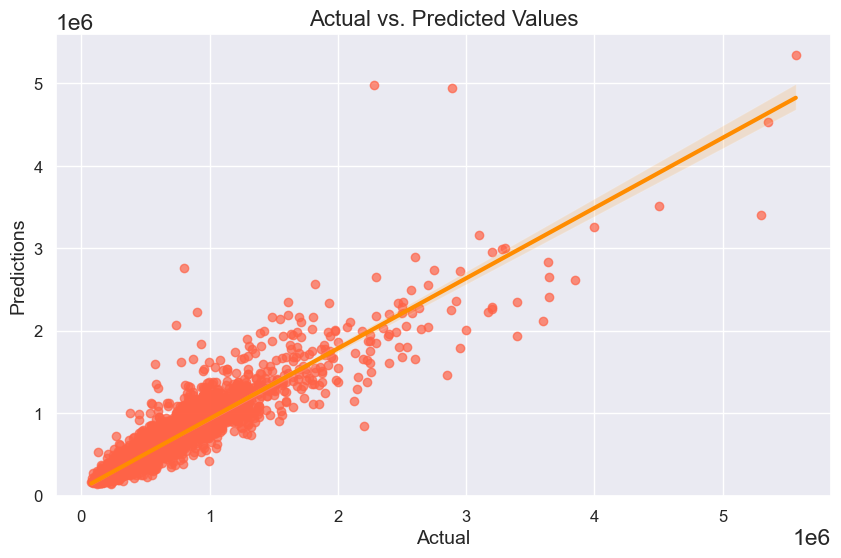

In [262]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

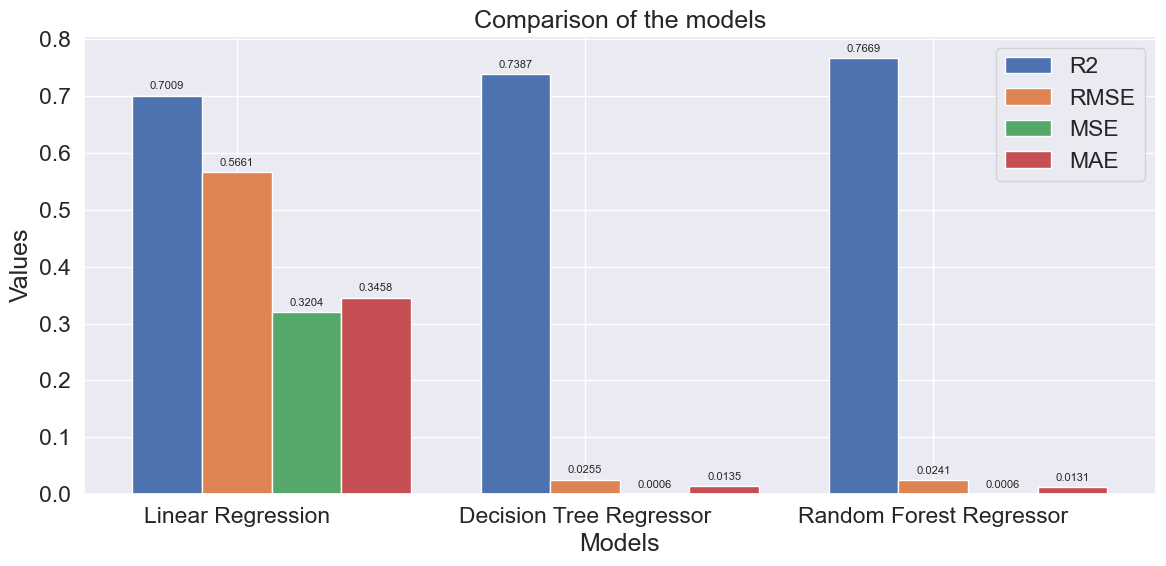

In [217]:
import matplotlib.pyplot as plt
import numpy as np

# Definiere die Dictionaries
LinearRegression = {'R2': 0.7009, 'RMSE': 0.5661, 'MSE': 0.3204, 'MAE': 0.3458}
DecTreeRegressor = {'R2': 0.7387, 'RMSE': 0.0255, 'MSE': 0.0006, 'MAE': 0.0135}
RandomForestRegressor = {'R2': 0.7669, 'RMSE': 0.0241, 'MSE': 0.0006, 'MAE': 0.0131}

# Extrahiere die Werte und Beschriftungen
metrics = list(LinearRegression.keys())
models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
linear_reg_values = list(LinearRegression.values())
dec_tree_values = list(DecTreeRegressor.values())
random_forest_values = list(RandomForestRegressor.values())

# Gruppiere die Daten
values = [linear_reg_values, dec_tree_values, random_forest_values]

# Setze die Positionen und Breite der Balken
x = np.arange(len(models))  # Die Positionen der Gruppen
width = 0.2  # Die Breite der Balken

# Erstelle das Diagramm und passe die Größe an
fig, ax = plt.subplots(figsize=(12, 6))  # Größeres Diagramm

# Erstelle Balken für jede Metrik
for i, metric in enumerate(metrics):
    metric_values = [values[j][i] for j in range(len(models))]
    ax.bar(x + i * width, metric_values, width, label=metric)

# Füge Beschriftungen und Titel hinzu
ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Comparison of the models')
ax.set_xticks(x + width)
ax.set_xticklabels(models)
ax.legend()

# Zeige die Werte über den Balken
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)  # Kleinere Schriftgröße

# Füge die Werte zu den Balken hinzu
for i in range(len(metrics)):
    bars = ax.containers[i]
    add_value_labels(bars)

# Zeige das Diagramm
plt.tight_layout()
plt.show()
